<a href="https://colab.research.google.com/github/Hoyadeath/practice_AI/blob/main/P_2_HR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
hr_data_preprocessing = files.upload()

Saving hr_data_preprocessing.csv to hr_data_preprocessing.csv


In [ ]:
import io
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print("library version check")
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

library version check
pandas: 1.5.3
matplotlib: 3.7.1
seaborn: 0.13.1


In [ ]:
df = pd.read_csv(io.BytesIO(hr_data_preprocessing['hr_data_preprocessing.csv']), encoding="utf-8", index_col=0)

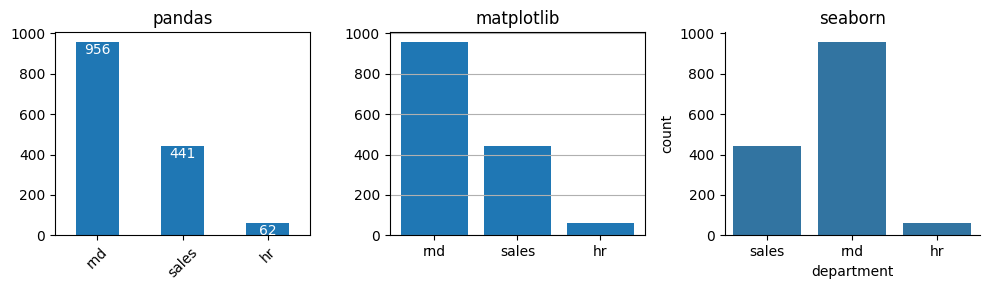

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

#visualizaion at (1, 1) by pandas
df["department"].value_counts().plot(kind = "bar", ax = ax1)
ax1.set_xticklabels(["rnd","sales","hr"], rotation=45)
ax1.set_title("pandas")

# Insert text in a graph
for p, count in zip(ax1.patches, df["department"].value_counts().values):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()-40
    ax1.annotate(count, (x, y), ha="center", va="center", color="white")

# visualizaion at (1, 2) by matplotlib
ax2.bar(df["department"].value_counts().keys(),df["department"].value_counts())
ax2.grid(axis="y")
ax2.set_title("matplotlib")

# visualizaion at (1, 3) by seaborn
sns.countplot(data = df, x = "department", ax = ax3)
ax3.spines[["top", "right"]].set_visible(False)
ax3.set_title("seaborn")

fig.tight_layout();

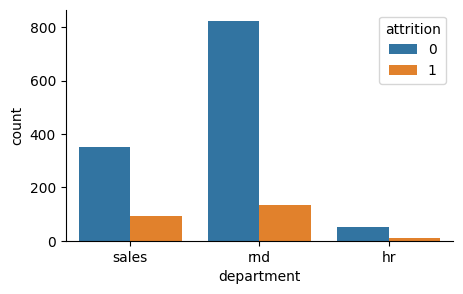

In [ ]:
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(data = df, x = "department", hue="attrition")
ax.spines[["top","right"]].set_visible(False);

In [ ]:
pd.crosstab(df["department"],df["attrition"], normalize="index")

attrition,0,1
department,,
hr,0.822581,0.177419
rnd,0.861925,0.138075
sales,0.793651,0.206349


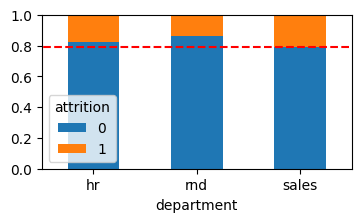

In [ ]:
fig, ax = plt.subplots(figsize=(4,2))
pd.crosstab(df["department"],
            df["attrition"],
            normalize="index").plot(kind = "bar", stacked=True, rot=0, ax=ax)
ax.set_ylim(0,1)
ax.plot([-2,5],[0.7936, 0.7936], color="red", ls="--");

In [ ]:
df.groupby(["department"])["salary"].mean()

department
hr       6.252758e+06
rnd      6.162250e+06
sales    6.088190e+06
Name: salary, dtype: float64

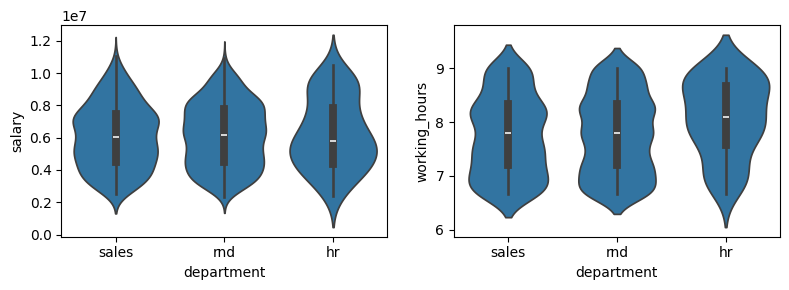

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

sns.violinplot(data=df, x="department", y="salary", ax=ax1)
sns.violinplot(data=df, x="department", y="working_hours", ax=ax2)

fig.tight_layout();

In [ ]:
)print("최소연령:", df["age"].min())
print("최대연령:", df["age"].max())
print("최소연령 인원:", sum(df["age"] == df["age"].min()))
print("60세 이상 인원:", sum(df["age"] >= 60))

최소연령: 22
최대연령: 64
최소연령 인원: 8
60세 이상 인원: 47


In [ ]:
def age_categorize(age):
    if 19 <= age < 30:
        age = 20
    elif 30 <= age < 50:
        age = (age//10)*10
    else:
        age = 50
    return age

In [ ]:
df["age_category"] = df["age"].apply(age_categorize).astype("category")

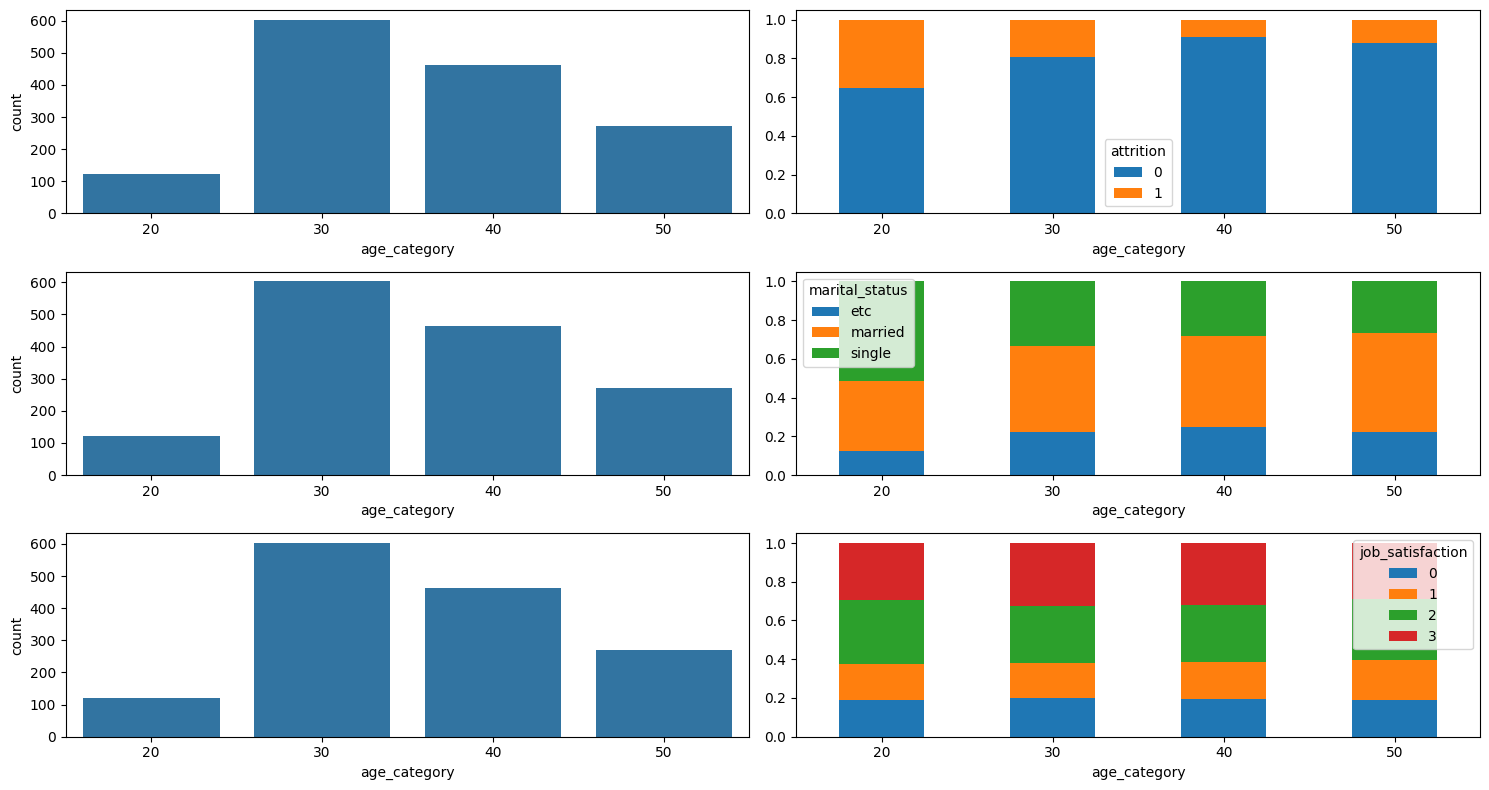

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15,8))

col_1 = ["age_category"]*3
col_2 = ["attrition", "marital_status","job_satisfaction"]

for col_left, col_right, (ax_left, ax_right) in zip(col_1, col_2, axes):
    sns.countplot(data=df, x=col_left, ax=ax_left)
    pd.crosstab(df[col_left],df[col_right],normalize='index').plot(kind="bar", stacked=True, rot=0, ax=ax_right)

fig.tight_layout();